In [161]:
#importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [162]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [163]:
#read  read train and Test Data

train_df = pd.read_csv("Ttrain.csv")

test_df = pd.read_csv("Ttest.csv")

In [164]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [166]:
#CHECKING IF THERE ARE ANY NULL VALUES IN TRAIN DATA

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
#Checking percentage of missing values

print('percentage of missing values of AGE is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

#train_df.shape[0] gives total no of observations

percentage of missing values of AGE is 19.87%


In [168]:
#checking percentage of missing values in cabin

print('Percentage of missing values of CABIN is %.2f%%'  %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing values of CABIN is 77.10%


In [169]:
#checking percentage of missing values in embarkment

print('Percentage of missing values of embarked is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing values of embarked is 0.22%


#Amputation of values by median and mode for AGE and Embarked 
#We ignore values of cabin as the % of errors are more than 70%

#There are missing values in age which are less than 20 % and can be replaced by median

#so i will replace them






In [170]:
train_df['Age'].fillna(train_df['Age'].median(skipna = True),inplace = True)
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace= True)

In [171]:
train_df = train_df.drop('Cabin',axis=1)

In [172]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [173]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [174]:
#Create categorical var's

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_df['Pclass'] = labelencoder.fit_transform(train_df['Pclass'])

In [175]:
train_df['Sex'] = labelencoder.fit_transform(train_df['Sex'])

In [176]:
train_df['Embarked'] = labelencoder.fit_transform(train_df['Embarked'])

In [177]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [178]:
train_orginal = train_df.copy()

In [179]:
train_df = train_df.drop(['PassengerId','Ticket','Name'],axis=1)

In [180]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [181]:
train_df['Travelalone']= np.where((train_df['SibSp'] + train_df['Parch'])>0 , 0,1) #0-no 1 - yes
train_df = train_df.drop(['SibSp','Parch'],axis = 1) 

In [182]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,2,1,22.0,7.2500,2,0
1,1,0,0,38.0,71.2833,0,0
2,1,2,0,26.0,7.9250,2,1
3,1,0,0,35.0,53.1000,2,0
4,0,2,1,35.0,8.0500,2,1


In [183]:
#splitting the D.V from Train data
y = pd.DataFrame(train_df["Survived"])
train_df = train_df.drop(['Survived'] , axis =1)

In [186]:
#SPLIT THE TRAIN DATA

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df,y, test_size=0.3, random_state=42)

In [187]:
x_train.shape

(623, 6)

In [188]:
x_test.shape

(268, 6)

In [189]:
y_train.shape

(623, 1)

In [190]:
y_test.shape

(268, 1)

In [191]:
#Apply same changes to the test data

test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [192]:
test_df['Age'].fillna(test_df['Age'].median(skipna = True ),inplace=True)

In [193]:
test_orginal = test_df  
test_df = test_df.drop(['Name','Ticket','Cabin'] , axis=1)

In [194]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [195]:
 test_df['Fare'].fillna(test_df['Fare'].median(skipna = True),inplace = True)

In [196]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [197]:
test_df = test_df.drop(['PassengerId'],axis=1)

In [198]:
label_encoder = preprocessing.LabelEncoder()

test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])

In [199]:
test_df['Pclass'] = label_encoder.fit_transform(test_df['Pclass'])

In [200]:
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

In [201]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2


In [202]:
test_df['Travelalone']= np.where((test_df['SibSp'] + test_df['Parch'])>0 , 0,1) #0-no 1 - yes
test_df = test_df.drop(['SibSp','Parch'],axis = 1) 

In [203]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,2,1,34.5,7.8292,1,1
1,2,0,47.0,7.0000,2,0
2,1,1,62.0,9.6875,1,1
3,2,1,27.0,8.6625,2,1
4,2,0,22.0,12.2875,2,0


In [204]:
test_orginal.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,2,1,22.0,7.2500,2,0
1,1,0,0,38.0,71.2833,0,0
2,1,2,0,26.0,7.9250,2,1
3,1,0,0,35.0,53.1000,2,0
4,0,2,1,35.0,8.0500,2,1


In [205]:
import seaborn as sns
sex = pd.crosstab([df_target.Survived], train_df.Sex )


In [206]:
#stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked = sex.stack().reset_index().rename(columns={0:'value'})

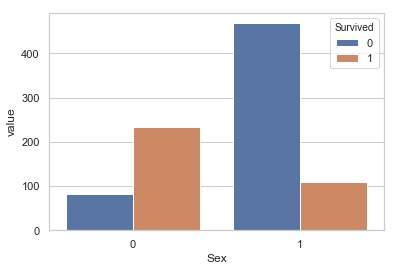

In [207]:
sns.barplot(x=stacked.Sex, y=stacked.value, hue=stacked.Survived)

C:\Users\Shilpa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


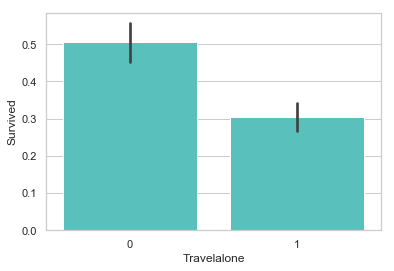

In [350]:
import seaborn as sns
sns.barplot(train_df.Travelalone, df_target.Survived,  color="mediumturquoise")
plt.show()

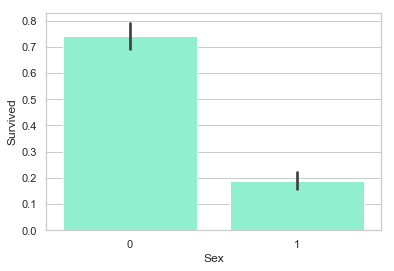

In [351]:
sns.barplot(train_df.Sex, df_target.Survived,color="aquamarine")
plt.show()

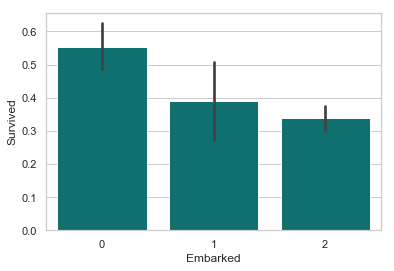

In [352]:
sns.barplot(train_df.Embarked, df_target.Survived, color="teal") #0-C , 1 - Q , 2 - S
plt.show()


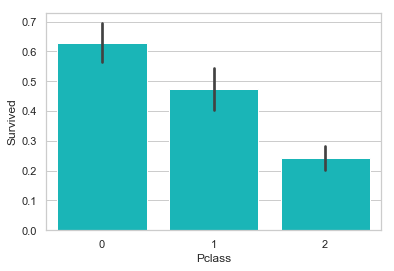

In [353]:
sns.barplot(train_df.Pclass, df_target.Survived, color="darkturquoise")
plt.show()


<Figure size 1080x576 with 0 Axes>

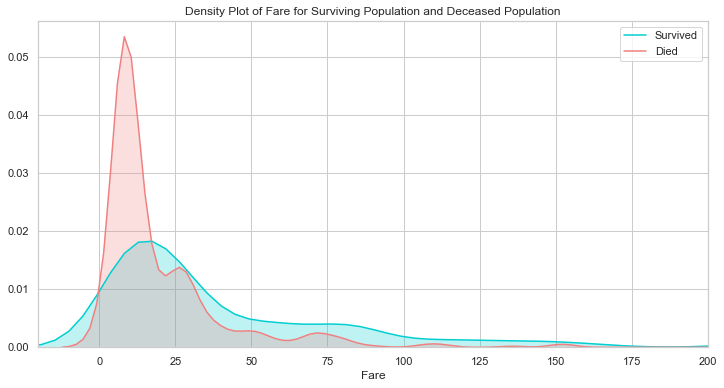

<Figure size 1080x576 with 0 Axes>

In [354]:
#to increase the graph size
plt.figure(figsize=(12,6))
ax=sns.kdeplot(train_df["Fare"][df_target.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Fare"][df_target.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
#to increase the graph size
plt.figure(figsize=(15,8))

In [208]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.503830
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Jan 2019   Pseudo R-squ.:                  0.2359
Time:                        11:48:50   Log-Likelihood:                -313.89
converged:                       True   LL-Null:                       -410.79
                                        LLR p-value:                 5.999e-40
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass         -0.1650      0.111     -1.489      0.136      -0.382       0.052
Sex            -2.1498    

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train,y_train)



C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [212]:
logreg.score(x_train,y_train)

0.7929373996789727

In [213]:
logreg.coef_

array([[-8.10073478e-01, -2.28530743e+00, -2.01204371e-02,
         2.19234178e-03, -2.75342301e-01,  4.49987623e-02]])

In [214]:
logreg.intercept_

array([2.80141769])

In [215]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [216]:
ypred = logreg.predict(x_test)

In [217]:
ypred.shape

(268,)

In [220]:
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [227]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
#tp, fp, fn, tn = confusion_matrix(y_test,ypred).ravel()
cm = confusion_matrix(y_test,ypred) 

In [226]:
tp,fp,fn,tn

(132, 25, 31, 80)

In [228]:
cm

array([[132,  25],
       [ 31,  80]], dtype=int64)

In [223]:
Accu = (132+80)/(132+25+31+80)

In [224]:
Accu

0.7910447761194029

# Testing the model with real data

In [229]:
realpred = logreg.predict(test_df)

In [230]:
realpred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [231]:
realpred=realpred.tolist() #intially ypred was in the form of array so converted to list


In [232]:
PID = test_orginal.PassengerId
PID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [233]:
PID = PID.tolist() #converted PID to list , now both ypred nd PID are in list format

In [234]:
d = {'PID' : PID,'Survived':realpred} #created a dictionary

In [235]:
df = pd.DataFrame(d) #passed or converted it into a dataframe

In [238]:
df.head()


,PID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [239]:
df.tail()

,PID,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
